In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import shap

In [2]:
df = pd.read_csv("/content/HR_Analytics.csv")
df.head(10)

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0   RM297   18    18-25       Yes      Travel_Rarely        230   
1   RM302   18    18-25        No      Travel_Rarely        812   
2   RM458   18    18-25       Yes  Travel_Frequently       1306   
3   RM728   18    18-25        No         Non-Travel        287   
4   RM829   18    18-25       Yes         Non-Travel        247   
5   RM973   18    18-25        No         Non-Travel       1124   
6  RM1154   18    18-25       Yes  Travel_Frequently        544   
7  RM1312   18    18-25        No         Non-Travel       1431   
8   RM128   19    18-25       Yes      Travel_Rarely        528   
9   RM150   19    18-25        No      Travel_Rarely       1181   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   
5  Research & Development                 1          3  Life Sciences  ...   
6                   Sales                 3          2        Medical  ...   
7  Research & Development                14          3        Medical  ...   
8                   Sales                22          1      Marketing  ...   
9  Research & Development                 3          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80                 0   
2                         4             80                 0   
3                         4             80                 0   
4                         4             80                 0   
5                         3             80                 0   
6                         3             80                 0   
7                         3             80                 0   
8                         4             80                 0   
9                         4             80                 0   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 0                      2                3               0   
1                 0                      2                3               0   
2                 0                      3                3               0   
3                 0                      2                3               0   
4                 0                      0                3               0   
5                 0                      5                4               0   
6                 0                      2                4               0   
7                 0                      4                1               0   
8                 0                      2                2               0   
9                 1                      3                3               1   

  YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                  0                        0                  0.0  
1                  0                        0                  0.0  
2                  0                        0                  0.0  
3                  0                        0                  0.0  
4                  0                        0                  0.0  
5                  0                        0                  0.0  
6                  0                        0                  0.0  
7                  0                        0                  0.0  
8                  0                        0                  0.0  
9                  0                        0                  0.0  

[10 rows x 38 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [4]:
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager        57
dtype: int64

In [5]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.729730   
std        605.955046                 1.092579    20.328266        0.713007   
min          1.000000                 1.000000    30.000000        1.000000   
25%        493.750000                 2.000000    48.000000        2.000000   
50%       1027.500000                 3.000000    66.000000        3.000000   
75%       1568.250000                 4.000000    83.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1480.000000  ...               1480.000000         1480.0   
mean      2.064865  ...                  2.708784           80.0   
std       1.105574  ...                  1.081995            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1480.000000        1480.000000            1480.000000   
mean           0.791892          11.281757               2.797973   
std            0.850527           7.770870               1.288791   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1480.000000     1480.000000         1480.000000   
mean          2.760811        7.009459            4.228378   
std           0.707024        6.117945            3.616020   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1480.000000           1423.000000  
mean                  2.182432              4.118060  
std                   3.219357              3.555484  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)

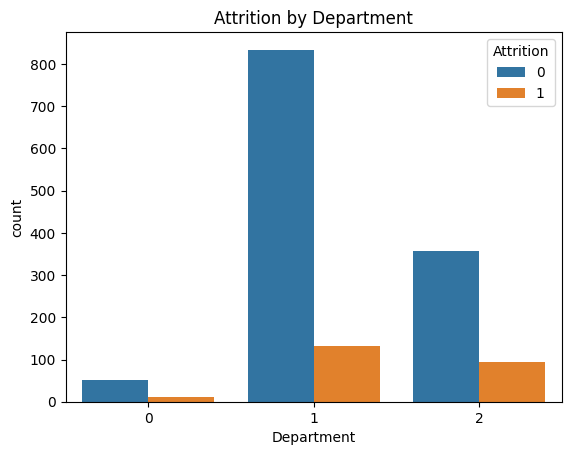

In [8]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

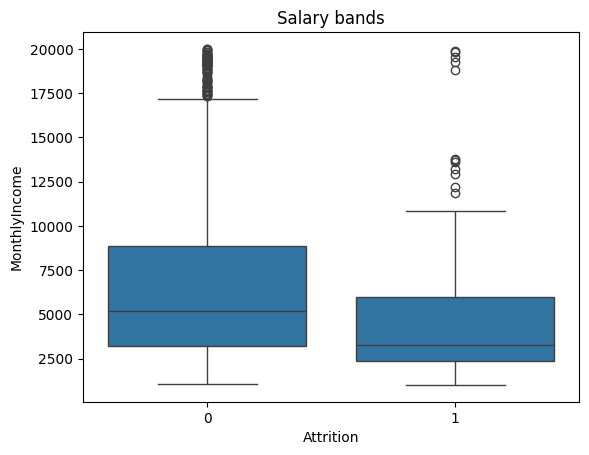

In [24]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Salary bands')
plt.show()

/tmp/ipython-input-2372363452.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x='YearsSinceLastPromotion',hue='Attrition', data=df, color = 'green')


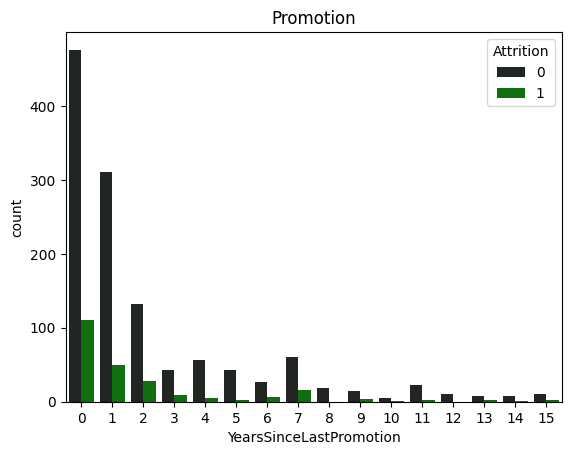

In [30]:
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition', data=df, color = 'green')
plt.title('Promotion')
plt.show()

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 0.8412162162162162
[[240   9]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       249
           1       0.50      0.19      0.28        47

    accuracy                           0.84       296
   macro avg       0.68      0.58      0.59       296
weighted avg       0.81      0.84      0.81       296



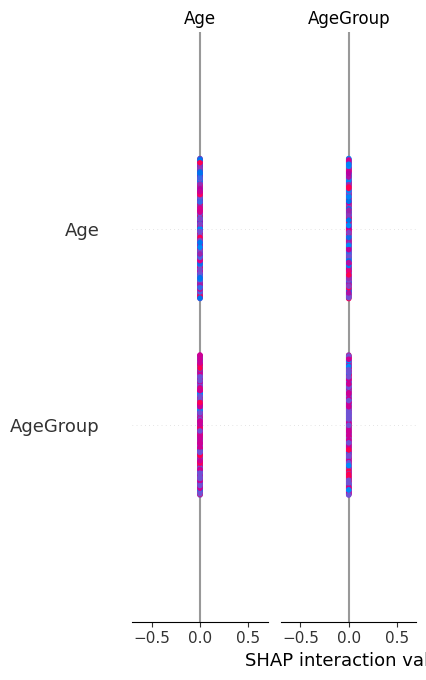

In [21]:
explainer = shap.Explainer(dt, X_train.drop('EmpID', axis=1))
shap_values = explainer.shap_values(X_test.drop('EmpID', axis=1))

shap.summary_plot(shap_values, X_test.drop('EmpID', axis=1))

In [23]:
predictions = X_test.copy()
predictions['Actual'] = y_test
predictions['Predicted'] = y_pred_dt
predictions.to_csv("Attrition_Predictions.csv", index=False)

print(" Exported 'Attrition_Predictions.csv' — ready for Power BI.")

 Exported 'Attrition_Predictions.csv' — ready for Power BI.
